# Calculations under the MS-SMC' using *ipcoal*

In [1]:
import toytree
import ipcoal
import numpy as np

In [2]:
# globals
SEED = 123
RECOMB = 2e-9
BRANCH = 2
NSAMPLES = 2

### Get a parameterized species tree
Generate a species tree with arbitrary variation in divergence times and effective population sizes.

In [3]:
# get an ultrametric 8-tip species tree topology
stree = toytree.rtree.unittree(ntips=8, treeheight=1e6, seed=SEED)

# set random Ne values to Nodes (species tree intervals)
rng = np.random.default_rng(seed=SEED)
random_neffs = {i.idx: rng.uniform(5e4, 5e5) for i in stree}
stree.set_node_data(feature="Ne", mapping=random_neffs, inplace=True)

# draw the species tree showing Ne variation
stree.draw(ts='p');

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="260.0px" viewBox="0 0 350.0 260.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tf6e0573f26a7465a8a0ecd0e4d0765f0"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 r0 r1 r2 r3 r4 r5 r6 r7 0 500000 1000000

### Simulate an embedded genealogy for 2 samples per species

In [4]:
# simulate an embedded genealogy and get mapping of species to samples, and draw tree
gtree, imap = ipcoal.get_embedded_genealogy(stree, nsamples=NSAMPLES, seed_trees=SEED)
gtree.draw(ts='c', node_labels="idx", node_labels_style={"baseline-shift": 8, "-toyplot-anchor-shift": 6});

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="270.0px" viewBox="0 0 350.0 270.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t9018dfda0b2d48e8b8b0efa846c3a8f6"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 r4_0 r4_1 r5_0 r5_1 r0_1 r2_0 r2_1 r3_0 r3_1 r0_0 r1_0 r1_1 r7_0 r7_1 r6_0 r6_1 0 1000000 2000000

### Decompose species tree and genealogy into a genealogy embedding table

In [5]:
# get genealogy embedding table
etable = ipcoal.smc.get_genealogy_embedding_table(stree, gtree, imap)
etable

,start,stop,st_node,neff,nedges,coal,edges,dist
0,0.000000e+00,250000.0,0,357058.338462,2,<NA>,"[4, 9]",250000.0
1,0.000000e+00,26669.945042,1,74219.458461,2,22,"[10, 11]",26669.945042
2,2.666995e+04,250000.0,1,74219.458461,1,<NA>,[22],223330.054958
3,2.500000e+05,500000.0,8,418889.552717,3,<NA>,"[4, 9, 22]",250000.0
4,0.000000e+00,30929.791384,2,149161.942748,2,19,"[5, 6]",30929.791384
5,3.092979e+04,250000.0,2,149161.942748,1,<NA>,[19],219070.208616
6,0.000000e+00,44197.26113,3,132967.314814,2,21,"[7, 8]",44197.26113
7,4.419726e+04,250000.0,3,132967.314814,1,<NA>,[21],205802.73887
8,2.500000e+05,500000.0,9,450451.711900,2,<NA>,"[19, 21]",250000.0
9,5.000000e+05,525269.202709,10,280836.704853,5,23,"[4, 9, 19, 21, 22]",25269.202709


## MS-SMC Calculations

In [6]:
# sample a time for recombination to occur on the middle of genealogy branch BRANCH
time = (gtree[BRANCH].up.height - gtree[BRANCH].height) / 2

### $P(\text{tree-unchanged}| \mathcal{S}, \mathcal{G}, b, t_r)$

In [7]:
ipcoal.smc.get_probability_tree_unchanged_given_b_and_tr(stree, gtree, imap, branch=BRANCH, time=time)

0.17407187951758207

### $P(\text{tree-unchanged}| \mathcal{S}, \mathcal{G}, b)$

In [8]:
ipcoal.smc.get_probability_tree_unchanged_given_b(stree, gtree, imap, branch=BRANCH)

0.1640327931924775

### $P(\text{tree-unchanged}| \mathcal{S}, \mathcal{G})$

In [9]:
ipcoal.smc.get_probability_tree_unchanged(stree, gtree, imap)

0.28214909797796683

### $P(\text{topology-unchanged}| \mathcal{S}, \mathcal{G}, b, t_r)$

In [10]:
ipcoal.smc.get_probability_topology_unchanged_given_b_and_tr(stree, gtree, imap, branch=BRANCH, time=time)

0.8458498420542999

### $P(\text{topology-unchanged}| \mathcal{S}, \mathcal{G}, b)$

In [11]:
ipcoal.smc.get_probability_topology_unchanged_given_b(stree, gtree, imap, branch=BRANCH)

0.8411017806094794

### $P(\text{topology-unchanged}| \mathcal{S}, \mathcal{G})$

In [12]:
ipcoal.smc.get_probability_topology_unchanged(stree, gtree, imap)

0.6268398905009844

## Expected waiting distances

In [13]:
ipcoal.smc.get_expected_waiting_distance_to_recombination_event(gtree, RECOMB)

39.188730873429265

In [14]:
ipcoal.smc.get_expected_waiting_distance_to_tree_change(stree, gtree, imap, RECOMB)

54.59174149261768

In [15]:
ipcoal.smc.get_expected_waiting_distance_to_topology_change(stree, gtree, imap, RECOMB)

105.01854264659187

## Visualize exponential waiting distance distributions

In [16]:
rv_recomb = ipcoal.smc.get_waiting_distance_to_recombination_event_rv(gtree, recombination_rate=RECOMB)
rv_tree = ipcoal.smc.get_waiting_distance_to_tree_change_rv(stree, gtree, imap, recombination_rate=RECOMB)
rv_topo = ipcoal.smc.get_waiting_distance_to_topology_change_rv(stree, gtree, imap, recombination_rate=RECOMB)

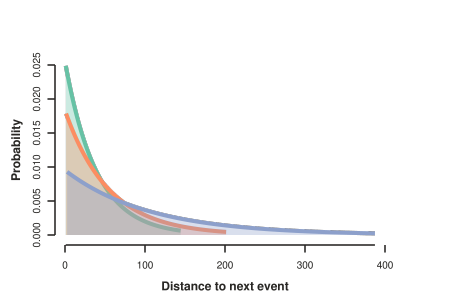

In [17]:
ipcoal.smc.plot_waiting_distance_distributions(stree, gtree, imap, RECOMB)

## Visualize probabilities along branches

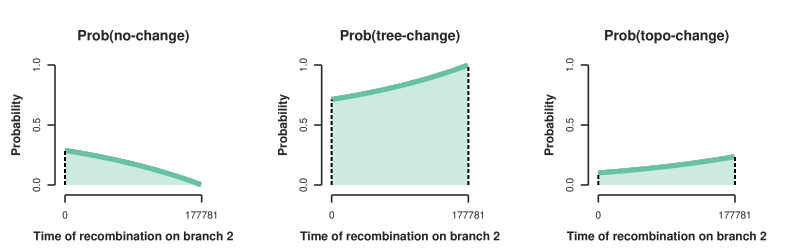

In [18]:
ipcoal.smc.plot_edge_probabilities(stree, gtree, imap, branch=BRANCH, stack=0)

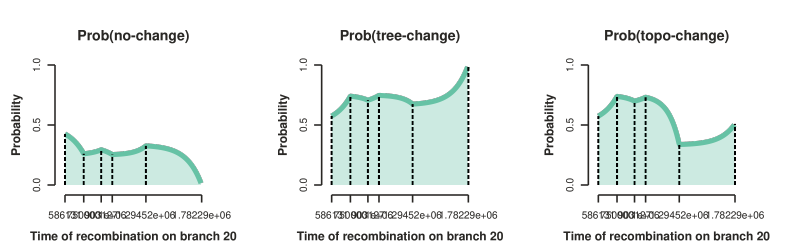

In [19]:
ipcoal.smc.plot_edge_probabilities(stree, gtree, imap, branch=20, stack=0)

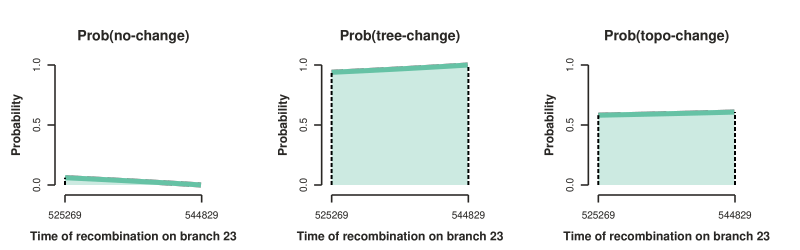

In [20]:
ipcoal.smc.plot_edge_probabilities(stree, gtree, imap, branch=23, stack=0)